# k-NN
### (Implementação usada na lista 01)

In [1]:
import pandas as pd
import numpy as np

In [2]:
def euclidean(ai, bi):
    return ((float(ai) - float(bi)))**2

In [3]:
def calcDistance(query, instance, weighted):
    distance = 0
    weight = 1
    for i in range(len(instance)-1):
        distance = distance + euclidean(query[i],instance[i])
    distance = (distance)**0.5
    if (weighted == 1):
        if (distance==0):
            distance = 0.01
        weight = 1/(distance**2)
    return ((distance, weight))

In [4]:
def vdm(ai, bi, attributeCount, pos, classList):
    nia = 0
    nib = 0
    vdmResult = 0
    for i in range(len(attributeCount)):
        if (attributeCount[i][0] == ai and attributeCount[i][2] == pos):
            nia = nia + attributeCount[i][3]
        if (attributeCount[i][0] == bi and attributeCount[i][2] == pos):
            nib = nib + attributeCount[i][3]
                   
    for j in range(len(classList)):
        niac = 0
        nibc = 0
        for i in range(len(attributeCount)):
            if (attributeCount[i][0] == ai and attributeCount[i][1] == classList[j] and attributeCount[i][2] == pos):
                niac = niac + attributeCount[i][3]
            if (attributeCount[i][0] == ai and attributeCount[i][1] == classList[j] and attributeCount[i][2] == pos):
                nibc = nibc + attributeCount[i][3]
        
        if (nia == 0):
            v1 = 0
        else:
            v1 = niac/nia
        
        if (nib == 0):
            v2 = 0
        else:
            v2 = nibc/nib
        
        calc = abs(v1-v2)
        vdmResult = vdmResult + calc
        
    return vdmResult

In [5]:
def calcVDM(query, instance, weighted, attributeCount, classList):
    distance = 0
    weight = 1
    for i in range(len(query)):
        distance = distance + vdm(query[i], instance[i], attributeCount, i, classList)
    
    distance = (distance)**0.5
    
    if (weighted == 1):
        if (distance==0):
            distance = 0.01
        weight = 1/(distance**2)
    
    return ((distance, weight))

In [6]:
def calcHVDM(query, instance, weighted, attributeCount, classList, typeList):
    distance = 0
    weight = 1
    for i in range(len(query)):
        if (typeList[i] == 'num'):
            distance = distance + ((euclidean(query[i], instance[i]))**2)
        elif (typeList[i] == 'cat'):
            distance = distance + ((vdm(query[i], instance[i], attributeCount, i, classList))**2)
    
    distance = (distance)**0.5
    
    if (weighted == 1):
        if(distance==0):
            distance = 0.01
        weight = 1/(distance**2)
    
    return ((distance, weight))

In [7]:
def getNeighbors(distances, n):
    classes = []
    classList = []
    for i in range(n):
        myClass = distances[i][0][-1]
        myWeight = distances[i][2]
        if (myClass not in classList):
            classes.append((myClass, myWeight))
            classList.append(myClass)
        else:
            for j in range(len(classes)):
                if (myClass == classes[j][0]):
                    classes[j] = list(classes[j])
                    classes[j][1] = classes[j][1] + myWeight
                    break
    
    classes.sort(key=lambda x: x[1], reverse=True)
    return classes[0][0]

In [8]:
def knn (query, data, weighted, dataType, typeList):
    # k = testInstance
    # 
    #dataType 0 = numérico, 1 = categorico, 2 = heterogeneo
    distances = []
    classes = []
    
    attributeCount = []
    
    classColumn = [row[-1] for row in data]
    classList = []
    
    for i in range(len(classColumn)):
        if (classColumn[i] not in classList):
            classList.append(classColumn[i])
    
    for i in range(len(data[0])-1):
        for j in range(len(data)):
            flag = 0
            for k in range(len(attributeCount)):
                if (data[j][i]==attributeCount[k][0] and data[j][-1]==attributeCount[k][1] and i == attributeCount[k][2]):
                    attributeCount[k][3] = attributeCount[k][3] + 1
                    flag = 1
                
            if(flag == 0):
                attributeCount.append([data[j][i], data[j][-1], i, 1])
            
            #if (data[j][i] not in attr):
             #   if (len(attr)==0):
              #      attributeCount.append([data[j][i], data[j][-1], 1])
               # else:
                #    for k in range(len(attributeCount)):
                 #       if (data[j][i]==attributeCount[k][0] and data[j][-1]==attributeCount[k][1]):
                  #          attributeCount[k][2] = attributeCount[k][2] + 1
                #attr.append([data[j][i], data[j][-1]])

    #euclidean
    if (dataType == 0):
        for i in range(len(data)):
            distance = calcDistance(query, data[i], weighted)
            distances.append((data[i], distance[0], distance[1]))
        distances.sort(key=lambda x: x[0], reverse=True)
        distances.sort(key=lambda x: x[1], reverse=False)
    #vdm
    elif (dataType == 1):
        for i in range(len(data)):
            distance = calcVDM(query, data[i], weighted, attributeCount, classList)
            distances.append((data[i], distance[0], distance[1]))
        distances.sort(key=lambda x: x[0], reverse=True)
        distances.sort(key=lambda x: x[1], reverse=False)
    
    #hvdm
    elif (dataType == 2):
        for i in range(len(data)):
            distance = calcHVDM(query, data[i], weighted, attributeCount, classList, typeList)
            distances.append((data[i], distance[0], distance[1]))
        distances.sort(key=lambda x: x[0], reverse=True)
        distances.sort(key=lambda x: x[1], reverse=False)
    
    return distances

# LVQ1

In [9]:
#criar X protótipos aleatórios(pelo menos 1 de cada classe)
#varrer o dataset aleatoriamente N vezes
    # achar o protótipo m mais próximo da instância x
    # ajustar posição do protótipo m pela regra m' = m + w(t)*[pos(x)-pos(m)]
        # w(t) 0.5 -> 0.01
        
#rodar knn no dataset dos protótipos

In [10]:
def createPrototypes(n, dataset, classes, mySeed):
    prototypes = []
    random.seed(mySeed)
    for i in range(len(classes)):
        myProt = []
        for j in range(len(dataset.T)-1):
            myMax = dataset.max()[j]
            myMin = dataset.min()[j]
            value = random.randint(myMin,myMax)
            myProt.append(value)
        myProt.append(classes[i])
        prototypes.append(myProt)
    
    for i in range(n - len(classes)):
        myProt = []
        for j in range(len(dataset.T)-1):
            myMax = dataset.max()[j]
            myMin = dataset.min()[j]
            value = random.randint(myMin,myMax)
            myProt.append(value)
        myClass = random.randint(0,(len(classes)-1))
        myProt.append(classes[myClass])
        prototypes.append(myProt)
    
    return prototypes

In [11]:
def protDists(instance, prototypes):
    distances = []
    for i in range(len(prototypes)):
        dist = calcDistance(instance,prototypes[i],0)
        distances.append([dist[0], i])
    distances.sort(key=lambda x: x[0], reverse=False)
    return distances

In [12]:
def getDiff(instance, prototype):
    diff = []
    for i in range(len(instance)-1):
        diff.append(instance[i] - prototype[i])
    return diff

In [13]:
def applyDiff(prototype, diff, opp, alfa):
    for i in range(len(prototype)-1):
        if(opp == 1):
            prototype[i] = prototype[i] + alfa*diff[i]
        else:
            prototype[i] = prototype[i] - alfa*diff[i]
    return prototype

In [14]:
def adjustPrototypes(n, trainset, prototypes, mySeed):
    random.seed(mySeed)
    
    alfa = 0.5
    finalAlfa = 0.01
    steps = len(trainset)*n
    ratio = (alfa - finalAlfa)/steps
    
    for i in range (n):
        for j in range(len(trainset)):
            pos = random.randint(0,(len(trainset)-1))
            closestProtPos = protDists(trainset.iloc[pos],prototypes)[0][1]
            diff = getDiff(trainset.iloc[pos],prototypes[closestProtPos])

            if (trainset.iloc[pos][-1] == prototypes[closestProtPos][-1]):
                prototypes[closestProtPos] = applyDiff(prototypes[closestProtPos], diff, 1, alfa)
            else:
                prototypes[closestProtPos] = applyDiff(prototypes[closestProtPos], diff, 0, alfa)
                
            alfa = alfa - ratio
    return prototypes

# LVQ2.1

In [15]:
#varrer o dataset aleatoriamente N vezes
    # achar os 2 protótipos m e l mais próximos da instância x
    # ajustar posição dos protótipos m e l pela regra:
        # if(m != l):
            #m' = m + w(t)*[pos(x)-pos(m)]
            #l' = l - w(t)*[pos(x)-pos(m)]
        # w(t) 0.5 -> 0.01
        
#rodar knn no dataset dos protótipos

In [16]:
def adjustPrototypesLVQ2_1(n, trainset, prototypes, mySeed):
    random.seed(mySeed)
    
    alfa = 0.5
    finalAlfa = 0.01
    steps = len(trainset)*n
    ratio = (alfa - finalAlfa)/steps
    window = 0.6
    windowSize = (1-window)/(1+window)
    
    for i in range (n):
        for j in range(len(trainset)):
            pos = random.randint(0,(len(trainset)-1))
            closestProtPos = protDists(trainset.iloc[pos],prototypes)[0][1]
            secClosestProtPos = protDists(trainset.iloc[pos],prototypes)[1][1]
            diff = getDiff(trainset.iloc[pos],prototypes[closestProtPos])
            
            
            if (prototypes[closestProtPos][-1] != prototypes[secClosestProtPos][-1]):
                distA = calcDistance(trainset.iloc[pos], prototypes[closestProtPos], 0)[0]
                distB = calcDistance(trainset.iloc[pos], prototypes[secClosestProtPos], 0)[0]
                distRatio = min(distA/distB,distB/distA)
                if (distRatio <= windowSize):
                    if(prototypes[closestProtPos][-1] == trainset.iloc[pos][-1]):
                        prototypes[closestProtPos] = applyDiff(prototypes[closestProtPos], diff, 1, alfa)
                        prototypes[secClosestProtPos] = applyDiff(prototypes[secClosestProtPos], diff, 0, alfa)
                    elif (prototypes[secClosestProtPos][-1] == trainset.iloc[pos][-1]):
                        prototypes[closestProtPos] = applyDiff(prototypes[closestProtPos], diff, 0, alfa)
                        prototypes[secClosestProtPos] = applyDiff(prototypes[secClosestProtPos], diff, 1, alfa)
                
            alfa = alfa - ratio
    return prototypes

# LVQ3

In [17]:
#varrer o dataset aleatoriamente N vezes
    # achar os 2 protótipos m e l mais próximos da instância x
    # ajustar posição dos protótipos m e l pela regra:
            #m' = m +- w(t)*[pos(x)-pos(m)]
            #l' = l +- w(t)*[pos(x)-pos(m)]
        # w(t) 0.5 -> 0.01
        
#rodar knn no dataset dos protótipos

In [18]:
def adjustPrototypesLVQ3(n, trainset, prototypes, mySeed):
    random.seed(mySeed)
    
    alfa = 0.5
    finalAlfa = 0.01
    steps = len(trainset)*n
    ratio = (alfa - finalAlfa)/steps
    window = 0.6
    windowSize = (1-window)/(1+window)
    estabilization = 0.5
    
    for i in range (n):
        for j in range(len(trainset)):
            pos = random.randint(0,(len(trainset)-1))
            closestProtPos = protDists(trainset.iloc[pos],prototypes)[0][1]
            secClosestProtPos = protDists(trainset.iloc[pos],prototypes)[1][1]
            diff = getDiff(trainset.iloc[pos],prototypes[closestProtPos])
            
            distA = calcDistance(trainset.iloc[pos], prototypes[closestProtPos], 0)[0]
            distB = calcDistance(trainset.iloc[pos], prototypes[secClosestProtPos], 0)[0]
            distRatio = min(distA/distB,distB/distA)
            if (distRatio <= windowSize):
                if (prototypes[closestProtPos][-1] != prototypes[secClosestProtPos][-1]):
                    if(prototypes[closestProtPos][-1] == trainset.iloc[pos][-1]):
                        prototypes[closestProtPos] = applyDiff(prototypes[closestProtPos], diff, 1, alfa)
                        prototypes[secClosestProtPos] = applyDiff(prototypes[secClosestProtPos], diff, 0, alfa)
                    elif (prototypes[secClosestProtPos][-1] == trainset.iloc[pos][-1]):
                        prototypes[closestProtPos] = applyDiff(prototypes[closestProtPos], diff, 0, alfa)
                        prototypes[secClosestProtPos] = applyDiff(prototypes[secClosestProtPos], diff, 1, alfa)
                elif (prototypes[closestProtPos][-1] == trainset.iloc[pos][-1]):
                    prototypes[closestProtPos] = applyDiff(prototypes[closestProtPos], diff, 1, estabilization*alfa)
                    prototypes[secClosestProtPos] = applyDiff(prototypes[secClosestProtPos], diff, 1, estabilization*alfa)

            alfa = alfa - ratio
    return prototypes

# k-Folds Cross-Validation
### (Implementação usada na lista 01, mas usando os protótipos)

In [19]:
import random

In [20]:
def getClassList(dataset):
    classes = []
    for i in range(len(dataset)):
        if (dataset.iloc[i][-1] not in classes):
            classes.append(dataset.iloc[i][-1])
            
    return classes

In [21]:
def kFolds (dataset, k, shuffle, mySeed):
    
    if (shuffle==1):
        random.seed(mySeed)
        finalDataset = dataset.sample(frac=1, random_state=mySeed)
    else:
        finalDataset = dataset.copy()
        
    splittedDataset = np.array_split(finalDataset, k)
    
    return splittedDataset

In [22]:
def crossValidation(dataset, kFold, shuffle, mySeed, kVariation, weighted, dataType, typeList):
    
    foldHits = []
    for i in range(len(kVariation)):
        foldHits.append(0)
        
    datasetFolds = kFolds(dataset, kFold, shuffle, mySeed)
    for i in range(kFold):
        testset = datasetFolds[i].reset_index(drop=True)
        frames = []
        for j in range(kFold):
            if (not j==i):
                frames.append(datasetFolds[j])
        trainset = pd.concat(frames).reset_index(drop=True)
        hits = 0
        trainsetList = trainset.values.tolist()
        for m in range(len(testset)):
            neighbors = knn(testset.iloc[m], trainsetList, weighted, dataType, typeList)
            for z in range(len(kVariation)):
                prediction = getNeighbors(neighbors, kVariation[z])    
                if (prediction == testset.iloc[m][-1]):
                    foldHits[z] = foldHits[z] + 1
                
    
    for n in range(len(foldHits)):
        foldHits[n] = foldHits[n]/len(dataset)    
    return foldHits

In [23]:
def crossValidationPrototypes(dataset, kFold, shuffle, mySeed, kVariation, weighted, dataType, typeList, protQuant, iterations, lvqType):
    
    classes = getClassList(dataset)
    
    foldHits = []
    for i in range(len(kVariation)):
        foldHits.append(0)
        
    datasetFolds = kFolds(dataset, kFold, shuffle, mySeed)
    for i in range(kFold):
        testset = datasetFolds[i].reset_index(drop=True)
        frames = []
        for j in range(kFold):
            if (not j==i):
                frames.append(datasetFolds[j])
        trainset = pd.concat(frames).reset_index(drop=True)
        
        prototypes = createPrototypes(protQuant, trainset, classes, mySeed)
        prototypes = adjustPrototypes(iterations, trainset, prototypes, mySeed)
        
        if (lvqType == 2):
            prototypes = adjustPrototypesLVQ2_1(iterations, trainset, prototypes, mySeed)
        elif (lvqType == 3):
            prototypes = adjustPrototypesLVQ3(iterations, trainset, prototypes, mySeed)
       
        hits = 0
        
        if (lvqType == 0):
            trainsetList = trainset.values.tolist()
        trainsetList = prototypes
        
        for m in range(len(testset)):
            neighbors = knn(testset.iloc[m], trainsetList, weighted, dataType, typeList)
            for z in range(len(kVariation)):
                prediction = getNeighbors(neighbors, kVariation[z])    
                if (prediction == testset.iloc[m][-1]):
                    foldHits[z] = foldHits[z] + 1
                
    
    for n in range(len(foldHits)):
        foldHits[n] = foldHits[n]/len(dataset)    
    return foldHits

# Datasets

In [24]:
dataretrieve = pd.read_csv("..//datasets/dataretrieve.csv", na_values='?')
desharnais = pd.read_csv("..//datasets/desharnais.csv", na_values='?')
dataretrieve = dataretrieve.fillna(0)
desharnais = desharnais.fillna(0)

In [25]:
with open("..//datasets/dataretrieve.txt") as infile:
    dataretrievelist = infile.read()
    dataretrievelist = dataretrievelist.split(',')
with open("..//datasets/desharnais.txt") as infile:
    desharnaislist = infile.read()
    desharnaislist = desharnaislist.split(',')

# Cálculo do Score
### (Implementação usada na lista 01, sem medir o tempo e com uso de protótipos)

In [26]:
def calculateScores(dataset, weighted, dataType, typeList):
    scores = []
    #startTime = time.time()
    scores = crossValidation(dataset, 5, 1, 1000, kVariation, weighted, dataType, typeList)
    #finishTime = time.time()
    #totalTime = finishTime - startTime
    return scores #[,totalTime]

In [27]:
def calculateScoresPrototypes(dataset, weighted, dataType, typeList, protQuant, iterations, lvqType):
    scores = crossValidationPrototypes(dataset, 5, 1, 1000, kVariation, weighted, dataType, typeList, protQuant, iterations, lvqType)
    return scores

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

# Resultados sem protótipos

In [29]:
kVariation = [1,3]

In [30]:
dataretrieveNoProt = calculateScores(dataretrieve, 0, 0, dataretrievelist)
dataretrieveNoProtDF = pd.DataFrame([dataretrieveNoProt], columns = (["k1", "k3"]))
dataretrieveNoProtDF.to_csv("..//results/dataretrieveNoProt.csv", index=False)
dataretrieveNoProtDF

,k1,k3
0,0.838462,0.915385


In [31]:
desharnaisNoProt = calculateScores(desharnais, 0, 0, desharnaislist)
desharnaisNoProtDF = pd.DataFrame([desharnaisNoProt], columns = (["k1", "k3"]))
desharnaisNoProtDF.to_csv("..//results/desharnaisNoProt.csv", index=False)
desharnaisNoProtDF

,k1,k3
0,0.530864,0.555556


# Resultados com LVQ1

## Protótipos = nº de classes

In [32]:
classQuant = len(getClassList(dataretrieve))
if (classQuant < 3):
    kVariation = [1]
dataretrieveLVQ1ProtN = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, classQuant, 3, 1)
dataretrieveLVQ1ProtNDF = pd.DataFrame([dataretrieveLVQ1ProtN], columns = (["k1"]))
dataretrieveLVQ1ProtNDF.to_csv("..//results/dataretrieveLVQ1ProtN.csv", index=False)
kVariation = [1, 3]
dataretrieveLVQ1ProtNDF

,k1
0,0.907692


In [33]:
desharnaisLVQ1ProtN = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais)), 3, 1)
desharnaisLVQ1ProtNDF = pd.DataFrame([desharnaisLVQ1ProtN], columns = (["k1", "k3"]))
desharnaisLVQ1ProtNDF.to_csv("..//results/desharnaisLVQ1ProtN.csv", index=False)
desharnaisLVQ1ProtNDF

,k1,k3
0,0.567901,0.567901


## Protótipos = nº de classes + 1

In [34]:
dataretrieveLVQ1ProtN1 = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))+1, 3, 1)
dataretrieveLVQ1ProtN1DF = pd.DataFrame([dataretrieveLVQ1ProtN1], columns = (["k1", "k3"]))
dataretrieveLVQ1ProtN1DF.to_csv("..//results/dataretrieveLVQ1ProtN1.csv", index=False)
dataretrieveLVQ1ProtN1DF

,k1,k3
0,0.907692,0.084615


In [35]:
desharnaisLVQ1ProtN1 = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))+1, 3, 1)
desharnaisLVQ1ProtN1DF = pd.DataFrame([desharnaisLVQ1ProtN1], columns = (["k1", "k3"]))
desharnaisLVQ1ProtN1DF.to_csv("..//results/desharnaisLVQ1ProtN1.csv", index=False)
desharnaisLVQ1ProtN1DF

,k1,k3
0,0.555556,0.358025


## Protótipos = 2x nº de classes

In [36]:
dataretrieveLVQ1Prot2N = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))*2, 3, 1)
dataretrieveLVQ1Prot2NDF = pd.DataFrame([dataretrieveLVQ1Prot2N], columns = (["k1", "k3"]))
dataretrieveLVQ1Prot2NDF.to_csv("..//results/dataretrieveLVQ1Prot2N.csv", index=False)
dataretrieveLVQ1Prot2NDF

,k1,k3
0,0.907692,0.7


In [37]:
desharnaisLVQ1Prot2N = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))*2, 3, 1)
desharnaisLVQ1Prot2NDF = pd.DataFrame([desharnaisLVQ1Prot2N], columns = (["k1", "k3"]))
desharnaisLVQ1Prot2NDF.to_csv("..//results/desharnaisLVQ1Prot2N.csv", index=False)
desharnaisLVQ1Prot2NDF

,k1,k3
0,0.555556,0.506173


## Protótipos = 3x nº de classes

In [38]:
dataretrieveLVQ1Prot3N = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))*3, 3, 1)
dataretrieveLVQ1Prot3NDF = pd.DataFrame([dataretrieveLVQ1Prot3N], columns = (["k1", "k3"]))
dataretrieveLVQ1Prot3NDF.to_csv("..//results/dataretrieveLVQ1Prot3N.csv", index=False)
dataretrieveLVQ1Prot3NDF

,k1,k3
0,0.907692,0.707692


In [39]:
desharnaisLVQ1Prot3N = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))*3, 3, 1)
desharnaisLVQ1Prot3NDF = pd.DataFrame([desharnaisLVQ1Prot3N], columns = (["k1", "k3"]))
desharnaisLVQ1Prot3NDF.to_csv("..//results/desharnaisLVQ1Prot3N.csv", index=False)
desharnaisLVQ1Prot3NDF

,k1,k3
0,0.481481,0.382716


## Protótipos = 5x nº de classes

In [40]:
dataretrieveLVQ1Prot5N = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))*5, 3, 1)
dataretrieveLVQ1Prot5NDF = pd.DataFrame([dataretrieveLVQ1Prot5N], columns = (["k1", "k3"]))
dataretrieveLVQ1Prot5NDF.to_csv("..//results/dataretrieveLVQ1Prot5N.csv", index=False)
dataretrieveLVQ1Prot5NDF

,k1,k3
0,0.892308,0.853846


In [41]:
desharnaisLVQ1Prot5N = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))*5, 3, 1)
desharnaisLVQ1Prot5NDF = pd.DataFrame([desharnaisLVQ1Prot5N], columns = (["k1", "k3"]))
desharnaisLVQ1Prot5NDF.to_csv("..//results/desharnaisLVQ1Prot5N.csv", index=False)
desharnaisLVQ1Prot5NDF

,k1,k3
0,0.493827,0.493827


### Gráficos do LVQ1

In [82]:
dataretrieveLVQ1K1Results = []
dataretrieveLVQ1K1Results.append(dataretrieveNoProtDF['k1'][0])
dataretrieveLVQ1K1Results.append(dataretrieveLVQ1ProtNDF['k1'][0])
dataretrieveLVQ1K1Results.append(dataretrieveLVQ1ProtN1DF['k1'][0])
dataretrieveLVQ1K1Results.append(dataretrieveLVQ1Prot2NDF['k1'][0])
dataretrieveLVQ1K1Results.append(dataretrieveLVQ1Prot3NDF['k1'][0])
dataretrieveLVQ1K1Results.append(dataretrieveLVQ1Prot5NDF['k1'][0])

desharnaisLVQ1K1Results = []
desharnaisLVQ1K1Results.append(desharnaisNoProtDF['k1'][0])
desharnaisLVQ1K1Results.append(desharnaisLVQ1ProtNDF['k1'][0])
desharnaisLVQ1K1Results.append(desharnaisLVQ1ProtN1DF['k1'][0])
desharnaisLVQ1K1Results.append(desharnaisLVQ1Prot2NDF['k1'][0])
desharnaisLVQ1K1Results.append(desharnaisLVQ1Prot3NDF['k1'][0])
desharnaisLVQ1K1Results.append(desharnaisLVQ1Prot5NDF['k1'][0])

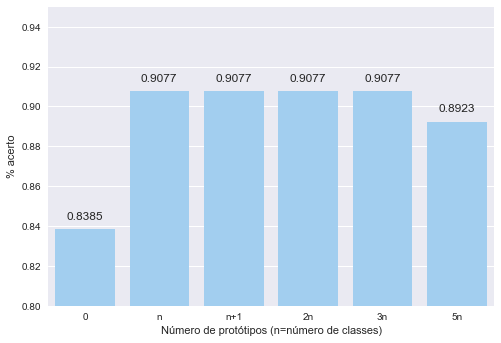

In [86]:
plt.ylim((0.80,0.95))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=dataretrieveLVQ1K1Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.15, p.get_height()+0.005))
plt.savefig("..//results/dataretrieveLVQ1K1Results.jpg")
plt.show()

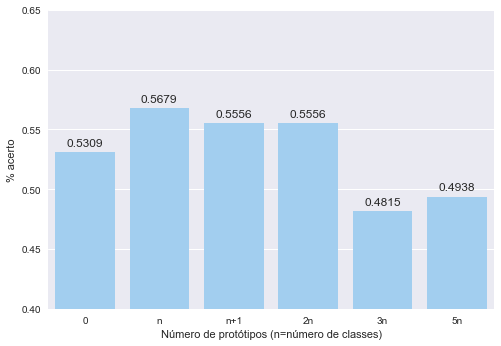

In [88]:
plt.ylim((0.4,0.65))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=desharnaisLVQ1K1Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.15, p.get_height()+0.005))
plt.savefig("..//results/desharnaisLVQ1K1Results.jpg")
plt.show()

In [95]:
dataretrieveLVQ1K3Results = []
dataretrieveLVQ1K3Results.append(dataretrieveNoProtDF['k3'][0])
dataretrieveLVQ1K3Results.append(0)
dataretrieveLVQ1K3Results.append(dataretrieveLVQ1ProtN1DF['k3'][0])
dataretrieveLVQ1K3Results.append(dataretrieveLVQ1Prot2NDF['k3'][0])
dataretrieveLVQ1K3Results.append(dataretrieveLVQ1Prot3NDF['k3'][0])
dataretrieveLVQ1K3Results.append(dataretrieveLVQ1Prot5NDF['k3'][0])

desharnaisLVQ1K3Results = []
desharnaisLVQ1K3Results.append(desharnaisNoProtDF['k3'][0])
desharnaisLVQ1K3Results.append(desharnaisLVQ1ProtNDF['k3'][0])
desharnaisLVQ1K3Results.append(desharnaisLVQ1ProtN1DF['k3'][0])
desharnaisLVQ1K3Results.append(desharnaisLVQ1Prot2NDF['k3'][0])
desharnaisLVQ1K3Results.append(desharnaisLVQ1Prot3NDF['k3'][0])
desharnaisLVQ1K3Results.append(desharnaisLVQ1Prot5NDF['k3'][0])

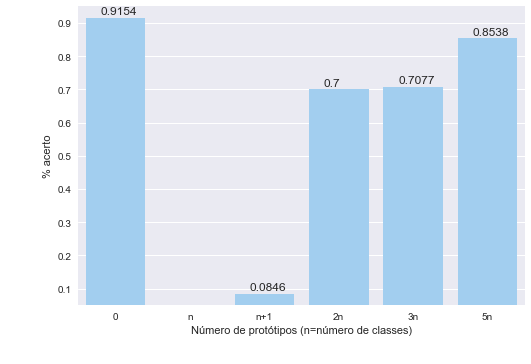

In [96]:
plt.ylim((0.05,0.95))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=dataretrieveLVQ1K3Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.20, p.get_height()+0.01))
plt.savefig("..//results/dataretrieveLVQ1K3Results.jpg")
plt.show()

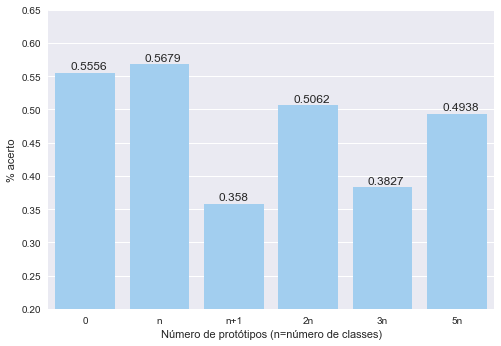

In [97]:
plt.ylim((0.2,0.65))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=desharnaisLVQ1K3Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.2, p.get_height()+0.005))
plt.savefig("..//results/desharnaisLVQ1K3Results.jpg")
plt.show()

# Resultados com LVQ2.1

## Protótipos = nº de classes

In [48]:
classQuant = len(getClassList(dataretrieve))
if (classQuant < 3):
    kVariation = [1]
dataretrieveLVQ2ProtN = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, classQuant, 3, 2)
dataretrieveLVQ2ProtNDF = pd.DataFrame([dataretrieveLVQ2ProtN], columns = (["k1"]))
dataretrieveLVQ2ProtNDF.to_csv("..//results/dataretrieveLVQ2ProtN.csv", index=False)
kVariation = [1, 3]
dataretrieveLVQ2ProtNDF

,k1
0,0.907692


In [49]:
desharnaisLVQ2ProtN = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais)), 3, 2)
desharnaisLVQ2ProtNDF = pd.DataFrame([desharnaisLVQ2ProtN], columns = (["k1", "k3"]))
desharnaisLVQ2ProtNDF.to_csv("..//results/desharnaisLVQ2ProtN.csv", index=False)
desharnaisLVQ2ProtNDF

,k1,k3
0,0.567901,0.567901


## Protótipos = nº de classes + 1

In [50]:
dataretrieveLVQ2ProtN1 = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))+1, 3, 2)
dataretrieveLVQ2ProtN1DF = pd.DataFrame([dataretrieveLVQ2ProtN1], columns = (["k1", "k3"]))
dataretrieveLVQ2ProtN1DF.to_csv("..//results/dataretrieveLVQ2ProtN1.csv", index=False)
dataretrieveLVQ2ProtN1DF

,k1,k3
0,0.915385,0.084615


In [51]:
desharnaisLVQ2ProtN1 = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))+1, 3, 2)
desharnaisLVQ2ProtN1DF = pd.DataFrame([desharnaisLVQ2ProtN1], columns = (["k1", "k3"]))
desharnaisLVQ2ProtN1DF.to_csv("..//results/desharnaisLVQ2ProtN1.csv", index=False)
desharnaisLVQ2ProtN1DF

,k1,k3
0,0.555556,0.407407


## Protótipos = 2x nº de classes

In [52]:
dataretrieveLVQ2Prot2N = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))*2, 3, 2)
dataretrieveLVQ2Prot2NDF = pd.DataFrame([dataretrieveLVQ2Prot2N], columns = (["k1", "k3"]))
dataretrieveLVQ2Prot2NDF.to_csv("..//results/dataretrieveLVQ2Prot2N.csv", index=False)
dataretrieveLVQ2Prot2NDF

,k1,k3
0,0.907692,0.7


In [53]:
desharnaisLVQ2Prot2N = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))*2, 3, 2)
desharnaisLVQ2Prot2NDF = pd.DataFrame([desharnaisLVQ2Prot2N], columns = (["k1", "k3"]))
desharnaisLVQ2Prot2NDF.to_csv("..//results/desharnaisLVQ1Prot2N.csv", index=False)
desharnaisLVQ2Prot2NDF

,k1,k3
0,0.530864,0.493827


## Protótipos = 3x nº de classes

In [54]:
dataretrieveLVQ2Prot3N = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))*3, 3, 2)
dataretrieveLVQ2Prot3NDF = pd.DataFrame([dataretrieveLVQ2Prot3N], columns = (["k1", "k3"]))
dataretrieveLVQ2Prot3NDF.to_csv("..//results/dataretrieveLVQ2Prot3N.csv", index=False)
dataretrieveLVQ2Prot3NDF

,k1,k3
0,0.907692,0.7


In [55]:
desharnaisLVQ2Prot3N = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))*3, 3, 2)
desharnaisLVQ2Prot3NDF = pd.DataFrame([desharnaisLVQ2Prot3N], columns = (["k1", "k3"]))
desharnaisLVQ2Prot3NDF.to_csv("..//results/desharnaisLVQ2Prot3N.csv", index=False)
desharnaisLVQ2Prot3NDF

,k1,k3
0,0.493827,0.395062


## Protótipos = 5x nº de classes

In [56]:
dataretrieveLVQ2Prot5N = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))*5, 3, 2)
dataretrieveLVQ2Prot5NDF = pd.DataFrame([dataretrieveLVQ2Prot5N], columns = (["k1", "k3"]))
dataretrieveLVQ2Prot5NDF.to_csv("..//results/dataretrieveLVQ2Prot5N.csv", index=False)
dataretrieveLVQ2Prot5NDF

,k1,k3
0,0.907692,0.853846


In [57]:
desharnaisLVQ2Prot5N = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))*5, 3, 2)
desharnaisLVQ2Prot5NDF = pd.DataFrame([desharnaisLVQ2Prot5N], columns = (["k1", "k3"]))
desharnaisLVQ2Prot5NDF.to_csv("..//results/desharnaisLVQ2Prot5N.csv", index=False)
desharnaisLVQ2Prot5NDF

,k1,k3
0,0.493827,0.493827


### Gráficos do LVQ2.1

In [98]:
dataretrieveLVQ2K1Results = []
dataretrieveLVQ2K1Results.append(dataretrieveNoProtDF['k1'][0])
dataretrieveLVQ2K1Results.append(dataretrieveLVQ2ProtNDF['k1'][0])
dataretrieveLVQ2K1Results.append(dataretrieveLVQ2ProtN1DF['k1'][0])
dataretrieveLVQ2K1Results.append(dataretrieveLVQ2Prot2NDF['k1'][0])
dataretrieveLVQ2K1Results.append(dataretrieveLVQ2Prot3NDF['k1'][0])
dataretrieveLVQ2K1Results.append(dataretrieveLVQ2Prot5NDF['k1'][0])

desharnaisLVQ2K1Results = []
desharnaisLVQ2K1Results.append(desharnaisNoProtDF['k1'][0])
desharnaisLVQ2K1Results.append(desharnaisLVQ2ProtNDF['k1'][0])
desharnaisLVQ2K1Results.append(desharnaisLVQ2ProtN1DF['k1'][0])
desharnaisLVQ2K1Results.append(desharnaisLVQ2Prot2NDF['k1'][0])
desharnaisLVQ2K1Results.append(desharnaisLVQ2Prot3NDF['k1'][0])
desharnaisLVQ2K1Results.append(desharnaisLVQ2Prot5NDF['k1'][0])

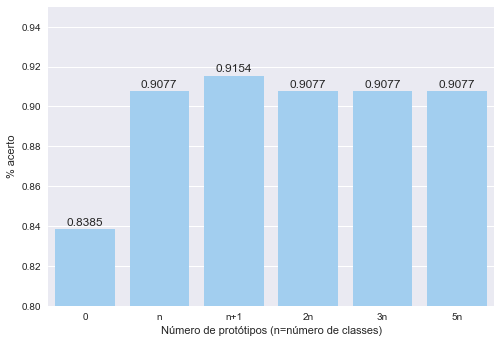

In [101]:
plt.ylim((0.80,0.95))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=dataretrieveLVQ2K1Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.15, p.get_height()+0.002))
plt.savefig("..//results/dataretrieveLVQ2K1Results.jpg")
plt.show()

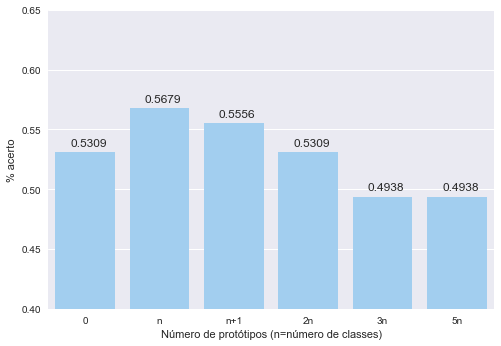

In [102]:
plt.ylim((0.4,0.65))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=desharnaisLVQ2K1Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.2, p.get_height()+0.005))
plt.savefig("..//results/desharnaisLVQ2K1Results.jpg")
plt.show()

In [103]:
dataretrieveLVQ2K3Results = []
dataretrieveLVQ2K3Results.append(dataretrieveNoProtDF['k3'][0])
dataretrieveLVQ2K3Results.append(0)
dataretrieveLVQ2K3Results.append(dataretrieveLVQ2ProtN1DF['k3'][0])
dataretrieveLVQ2K3Results.append(dataretrieveLVQ2Prot2NDF['k3'][0])
dataretrieveLVQ2K3Results.append(dataretrieveLVQ2Prot3NDF['k3'][0])
dataretrieveLVQ2K3Results.append(dataretrieveLVQ2Prot5NDF['k3'][0])

desharnaisLVQ2K3Results = []
desharnaisLVQ2K3Results.append(desharnaisNoProtDF['k3'][0])
desharnaisLVQ2K3Results.append(desharnaisLVQ2ProtNDF['k3'][0])
desharnaisLVQ2K3Results.append(desharnaisLVQ2ProtN1DF['k3'][0])
desharnaisLVQ2K3Results.append(desharnaisLVQ2Prot2NDF['k3'][0])
desharnaisLVQ2K3Results.append(desharnaisLVQ2Prot3NDF['k3'][0])
desharnaisLVQ2K3Results.append(desharnaisLVQ2Prot5NDF['k3'][0])

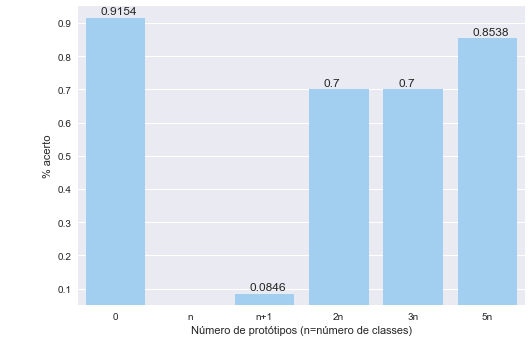

In [104]:
plt.ylim((0.05,0.95))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=dataretrieveLVQ2K3Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.20, p.get_height()+0.01))
plt.savefig("..//results/dataretrieveLVQ2K3Results.jpg")
plt.show()

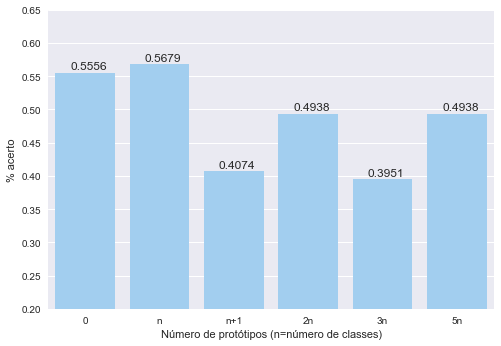

In [106]:
plt.ylim((0.2,0.65))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=desharnaisLVQ2K3Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.2, p.get_height()+0.005))
plt.savefig("..//results/desharnaisLVQ2K3Results.jpg")
plt.show()

# Resultados com LVQ3

## Protótipos = nº de classes

In [64]:
classQuant = len(getClassList(dataretrieve))
if (classQuant < 3):
    kVariation = [1]
dataretrieveLVQ3ProtN = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, classQuant, 3, 3)
dataretrieveLVQ3ProtNDF = pd.DataFrame([dataretrieveLVQ3ProtN], columns = (["k1"]))
dataretrieveLVQ3ProtNDF.to_csv("..//results/dataretrieveLVQ3ProtN.csv", index=False)
kVariation = [1, 3]
dataretrieveLVQ3ProtNDF

,k1
0,0.907692


In [65]:
desharnaisLVQ3ProtN = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais)), 3, 3)
desharnaisLVQ3ProtNDF = pd.DataFrame([desharnaisLVQ3ProtN], columns = (["k1", "k3"]))
desharnaisLVQ3ProtNDF.to_csv("..//results/desharnaisLVQ3ProtN.csv", index=False)
desharnaisLVQ3ProtNDF

,k1,k3
0,0.567901,0.567901


## Protótipos = nº de classes + 1

In [66]:
dataretrieveLVQ3ProtN1 = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))+1, 3, 3)
dataretrieveLVQ3ProtN1DF = pd.DataFrame([dataretrieveLVQ2ProtN1], columns = (["k1", "k3"]))
dataretrieveLVQ3ProtN1DF.to_csv("..//results/dataretrieveLVQ3ProtN1.csv", index=False)
dataretrieveLVQ3ProtN1DF

,k1,k3
0,0.915385,0.084615


In [67]:
desharnaisLVQ3ProtN1 = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))+1, 3, 3)
desharnaisLVQ3ProtN1DF = pd.DataFrame([desharnaisLVQ3ProtN1], columns = (["k1", "k3"]))
desharnaisLVQ3ProtN1DF.to_csv("..//results/desharnaisLVQ3ProtN1.csv", index=False)
desharnaisLVQ3ProtN1DF

,k1,k3
0,0.555556,0.407407


## Protótipos = 2x nº de classes

In [68]:
dataretrieveLVQ3Prot2N = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))*2, 3, 3)
dataretrieveLVQ3Prot2NDF = pd.DataFrame([dataretrieveLVQ3Prot2N], columns = (["k1", "k3"]))
dataretrieveLVQ3Prot2NDF.to_csv("..//results/dataretrieveLVQ3Prot2N.csv", index=False)
dataretrieveLVQ3Prot2NDF

,k1,k3
0,0.907692,0.684615


In [69]:
desharnaisLVQ3Prot2N = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))*2, 3, 3)
desharnaisLVQ3Prot2NDF = pd.DataFrame([desharnaisLVQ3Prot2N], columns = (["k1", "k3"]))
desharnaisLVQ3Prot2NDF.to_csv("..//results/desharnaisLVQ3Prot2N.csv", index=False)
desharnaisLVQ3Prot2NDF

,k1,k3
0,0.530864,0.419753


## Protótipos = 3x nº de classes

In [70]:
dataretrieveLVQ3Prot3N = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))*3, 3, 3)
dataretrieveLVQ3Prot3NDF = pd.DataFrame([dataretrieveLVQ3Prot3N], columns = (["k1", "k3"]))
dataretrieveLVQ3Prot3NDF.to_csv("..//results/dataretrieveLVQ3Prot3N.csv", index=False)
dataretrieveLVQ3Prot3NDF

,k1,k3
0,0.907692,0.7


In [71]:
desharnaisLVQ3Prot3N = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))*3, 3, 3)
desharnaisLVQ3Prot3NDF = pd.DataFrame([desharnaisLVQ3Prot3N], columns = (["k1", "k3"]))
desharnaisLVQ3Prot3NDF.to_csv("..//results/desharnaisLVQ3Prot3N.csv", index=False)
desharnaisLVQ3Prot3NDF

,k1,k3
0,0.493827,0.395062


## Protótipos = 5x nº de classes

In [72]:
dataretrieveLVQ3Prot5N = calculateScoresPrototypes(dataretrieve, 0, 0, dataretrievelist, len(getClassList(dataretrieve))*5, 3, 3)
dataretrieveLVQ3Prot5NDF = pd.DataFrame([dataretrieveLVQ3Prot5N], columns = (["k1", "k3"]))
dataretrieveLVQ3Prot5NDF.to_csv("..//results/dataretrieveLVQ3Prot5N.csv", index=False)
dataretrieveLVQ3Prot5NDF

,k1,k3
0,0.892308,0.838462


In [73]:
desharnaisLVQ3Prot5N = calculateScoresPrototypes(desharnais, 0, 0, desharnaislist, len(getClassList(desharnais))*5, 3, 3)
desharnaisLVQ3Prot5NDF = pd.DataFrame([desharnaisLVQ3Prot5N], columns = (["k1", "k3"]))
desharnaisLVQ3Prot5NDF.to_csv("..//results/desharnaisLVQ2Prot5N.csv", index=False)
desharnaisLVQ3Prot5NDF

,k1,k3
0,0.506173,0.493827


### Gráficos do LVQ3

In [107]:
dataretrieveLVQ3K1Results = []
dataretrieveLVQ3K1Results.append(dataretrieveNoProtDF['k1'][0])
dataretrieveLVQ3K1Results.append(dataretrieveLVQ3ProtNDF['k1'][0])
dataretrieveLVQ3K1Results.append(dataretrieveLVQ3ProtN1DF['k1'][0])
dataretrieveLVQ3K1Results.append(dataretrieveLVQ3Prot2NDF['k1'][0])
dataretrieveLVQ3K1Results.append(dataretrieveLVQ3Prot3NDF['k1'][0])
dataretrieveLVQ3K1Results.append(dataretrieveLVQ3Prot5NDF['k1'][0])

desharnaisLVQ3K1Results = []
desharnaisLVQ3K1Results.append(desharnaisNoProtDF['k1'][0])
desharnaisLVQ3K1Results.append(desharnaisLVQ3ProtNDF['k1'][0])
desharnaisLVQ3K1Results.append(desharnaisLVQ3ProtN1DF['k1'][0])
desharnaisLVQ3K1Results.append(desharnaisLVQ3Prot2NDF['k1'][0])
desharnaisLVQ3K1Results.append(desharnaisLVQ3Prot3NDF['k1'][0])
desharnaisLVQ3K1Results.append(desharnaisLVQ3Prot5NDF['k1'][0])

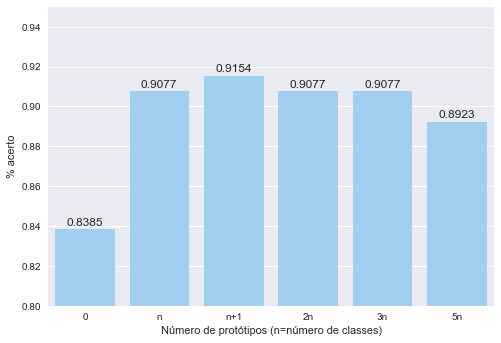

In [109]:
plt.ylim((0.80,0.95))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=dataretrieveLVQ3K1Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.15, p.get_height()+0.002))
plt.savefig("..//results/dataretrieveLVQ3K1Results.jpg")
plt.show()

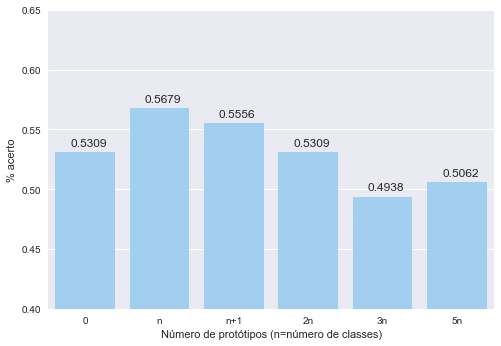

In [110]:
plt.ylim((0.4,0.65))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=desharnaisLVQ3K1Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.2, p.get_height()+0.005))
plt.savefig("..//results/desharnaisLVQ3K1Results.jpg")
plt.show()

In [111]:
dataretrieveLVQ3K3Results = []
dataretrieveLVQ3K3Results.append(dataretrieveNoProtDF['k3'][0])
dataretrieveLVQ3K3Results.append(0)
dataretrieveLVQ3K3Results.append(dataretrieveLVQ3ProtN1DF['k3'][0])
dataretrieveLVQ3K3Results.append(dataretrieveLVQ3Prot2NDF['k3'][0])
dataretrieveLVQ3K3Results.append(dataretrieveLVQ3Prot3NDF['k3'][0])
dataretrieveLVQ3K3Results.append(dataretrieveLVQ3Prot5NDF['k3'][0])

desharnaisLVQ3K3Results = []
desharnaisLVQ3K3Results.append(desharnaisNoProtDF['k3'][0])
desharnaisLVQ3K3Results.append(desharnaisLVQ3ProtNDF['k3'][0])
desharnaisLVQ3K3Results.append(desharnaisLVQ3ProtN1DF['k3'][0])
desharnaisLVQ3K3Results.append(desharnaisLVQ3Prot2NDF['k3'][0])
desharnaisLVQ3K3Results.append(desharnaisLVQ3Prot3NDF['k3'][0])
desharnaisLVQ3K3Results.append(desharnaisLVQ3Prot5NDF['k3'][0])

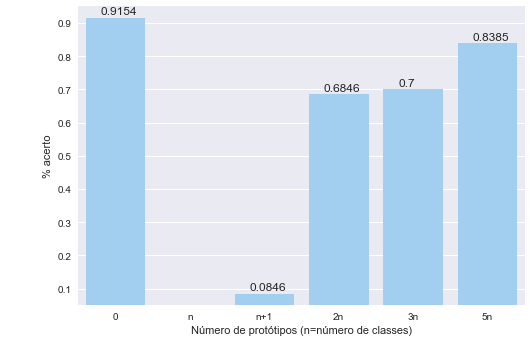

In [112]:
plt.ylim((0.05,0.95))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=dataretrieveLVQ3K3Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.20, p.get_height()+0.01))
plt.savefig("..//results/dataretrieveLVQ3K3Results.jpg")
plt.show()

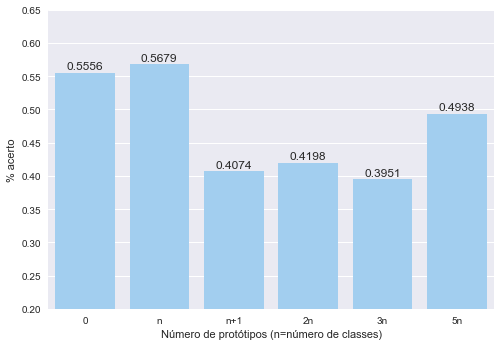

In [114]:
plt.ylim((0.2,0.65))
ax = sns.barplot(x=['0','n','n+1','2n','3n','5n'], y=desharnaisLVQ3K3Results, color = sns.xkcd_rgb['light blue'])
ax.set(xlabel='Número de protótipos (n=número de classes)')
ax.set(ylabel='% acerto')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=4), (p.get_x()+0.15, p.get_height()+0.005))
plt.savefig("..//results/desharnaisLVQ3K3Results.jpg")
plt.show()